# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
mean_housing_units = sfo_data['housing_units'].groupby(sfo_data.index).mean()
mean_housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [5]:
# Save the dataframe as a csv file
mean_housing_units.to_csv('mean_housing_units_sfo.csv')

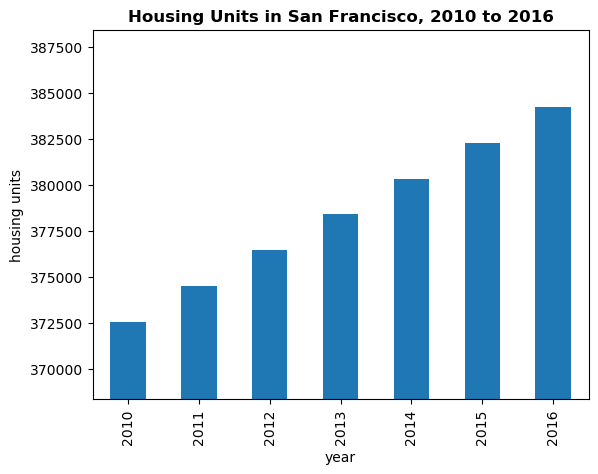

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
figure_housing_units = plt.figure()
bar_housing = mean_housing_units.plot.bar()
bar_housing.set_ylabel("housing units")
bar_housing.set_title("Housing Units in San Francisco, 2010 to 2016", fontweight="bold")

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!
housing_units_std = mean_housing_units.std()
housing_units_min = mean_housing_units.min()
housing_units_max = mean_housing_units.max()

bar_housing.set_ylim(housing_units_min - housing_units_std, housing_units_max + housing_units_std)

plt.show()
plt.close(figure_housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# Calculate the average sale price per square foot and average gross rent
average_cost = (
    sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby(sfo_data.index).mean()
)

average_cost

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

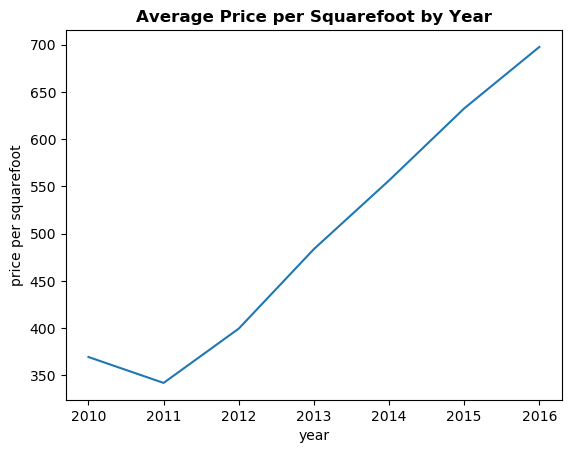

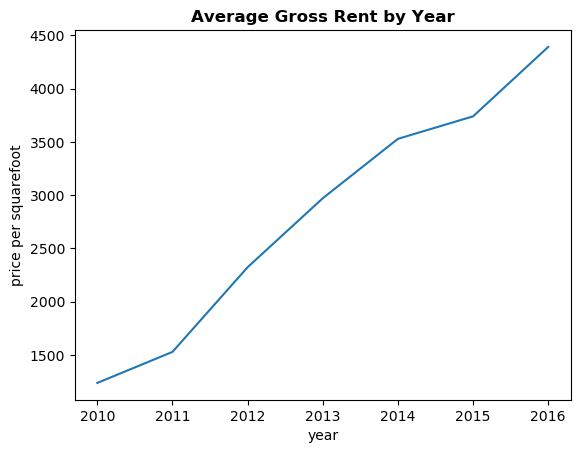

In [8]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
figure_average = plt.figure()
sqrfoot_bar = average_cost['sale_price_sqr_foot'].plot()
sqrfoot_bar.set_ylabel('price per squarefoot')
sqrfoot_bar.set_title('Average Price per Squarefoot by Year', fontweight="bold")

plt.show()
plt.close(figure_average)


# Line chart for average montly rent
grossrent_bar = average_cost['gross_rent'].plot()
grossrent_bar.set_ylabel('price per squarefoot')
grossrent_bar.set_title('Average Gross Rent by Year', fontweight="bold")

plt.show()
plt.close(figure_average)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_cost = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
neighborhood_cost.reset_index(inplace=True)
neighborhood_cost

year            neighborhood  sale_price_sqr_foot  housing_units  \
0    2010            Alamo Square           291.182945         372560   
1    2010              Anza Vista           267.932583         372560   
2    2010                 Bayview           170.098665         372560   
3    2010        Buena Vista Park           347.394919         372560   
4    2010        Central Richmond           319.027623         372560   
..    ...                     ...                  ...            ...   
392  2016          Telegraph Hill           903.049771         384242   
393  2016              Twin Peaks           970.085470         384242   
394  2016  Van Ness/ Civic Center           552.602567         384242   
395  2016       Visitacion Valley           328.319007         384242   
396  2016           Westwood Park           631.195426         384242   

     gross_rent  
0          1239  
1          1239  
2          1239  
3          1239  
4          1239  
..          ...  
392        4390  
393        4390  
394        4390  
395        4390  
396        4390  

[397 rows x 5 columns]

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_cost.hvplot.line(
    'year',
    'sale_price_sqr_foot',
    groupby="neighborhood"
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [11]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neighborhood_cost.hvplot.line(
    'year',
    'gross_rent',
    groupby="neighborhood"
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [12]:
# Getting the data from the top 10 expensive neighborhoods to own
most_expensive = sfo_data.groupby("neighborhood").mean()
most_expensive = most_expensive.sort_values("sale_price_sqr_foot", ascending=False).head(10)
most_expensive = most_expensive.reset_index()
most_expensive

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

In [32]:
# Plotting the data from the top 10 expensive neighborhoods
most_expensive.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [14]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
neighborhood_cost

year            neighborhood  sale_price_sqr_foot  housing_units  \
0    2010            Alamo Square           291.182945         372560   
1    2010              Anza Vista           267.932583         372560   
2    2010                 Bayview           170.098665         372560   
3    2010        Buena Vista Park           347.394919         372560   
4    2010        Central Richmond           319.027623         372560   
..    ...                     ...                  ...            ...   
392  2016          Telegraph Hill           903.049771         384242   
393  2016              Twin Peaks           970.085470         384242   
394  2016  Van Ness/ Civic Center           552.602567         384242   
395  2016       Visitacion Valley           328.319007         384242   
396  2016           Westwood Park           631.195426         384242   

     gross_rent  
0          1239  
1          1239  
2          1239  
3          1239  
4          1239  
..          ...  
392        4390  
393        4390  
394        4390  
395        4390  
396        4390  

[397 rows x 5 columns]

In [31]:
# Plotting the data from the top 10 expensive neighborhoods
neighborhood_cost.hvplot.bar(
    'year',
    ['gross_rent', 'sale_price_sqr_foot'],
    groupby='neighborhood'
)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [16]:
# Load neighborhoods coordinates data
file_path2 = Path("neighborhoods_coordinates.csv")
neighborhood_locations = pd.read_csv(file_path2)
neighborhood_locations

Neighborhood        Lat         Lon
0         Alamo Square  37.791012 -122.402100
1           Anza Vista  37.779598 -122.443451
2              Bayview  37.734670 -122.401060
3      Bayview Heights  37.728740 -122.410980
4       Bernal Heights  37.728630 -122.443050
..                 ...        ...         ...
68         West Portal  37.740260 -122.463880
69    Western Addition  37.792980 -122.435790
70  Westwood Highlands  37.734700 -122.456854
71       Westwood Park  37.734150 -122.457000
72         Yerba Buena  37.792980 -122.396360

[73 rows x 3 columns]

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood
neighborhood_mean = sfo_data.groupby('neighborhood').mean()
neighborhood_mean.reset_index(inplace=True)
neighborhood_mean.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
neighborhood_mean

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0         Alamo Square           366.020712      378401.00  2817.285714
1           Anza Vista           373.382198      379050.00  3031.833333
2              Bayview           204.588623      376454.00  2318.400000
3      Bayview Heights           590.792839      382295.00  3739.000000
4      Bernal Heights            576.746488      379374.50  3080.333333
..                 ...                  ...            ...          ...
68         West Portal           498.488485      376940.75  2515.500000
69    Western Addition           307.562201      377427.50  2555.166667
70  Westwood Highlands           533.703935      376454.00  2250.500000
71       Westwood Park           687.087575      382295.00  3959.000000
72         Yerba Buena           576.709848      377427.50  2555.166667

[73 rows x 4 columns]

In [18]:
# Join the average values with the neighborhood locations
neighborhood_mean = pd.merge(neighborhood_locations, neighborhood_mean, on='Neighborhood', how="inner")
neighborhood_mean

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0         Alamo Square  37.791012 -122.402100           366.020712   
1           Anza Vista  37.779598 -122.443451           373.382198   
2              Bayview  37.734670 -122.401060           204.588623   
3      Bayview Heights  37.728740 -122.410980           590.792839   
4     Buena Vista Park  37.768160 -122.439330           452.680591   
..                 ...        ...         ...                  ...   
64         West Portal  37.740260 -122.463880           498.488485   
65    Western Addition  37.792980 -122.435790           307.562201   
66  Westwood Highlands  37.734700 -122.456854           533.703935   
67       Westwood Park  37.734150 -122.457000           687.087575   
68         Yerba Buena  37.792980 -122.396360           576.709848   

    housing_units   gross_rent  
0       378401.00  2817.285714  
1       379050.00  3031.833333  
2       376454.00  2318.400000  
3       382295.00  3739.000000  
4       378076.50  2698.833333  
..            ...          ...  
64      376940.75  2515.500000  
65      377427.50  2555.166667  
66      376454.00  2250.500000  
67      382295.00  3959.000000  
68      377427.50  2555.166667  

[69 rows x 6 columns]

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

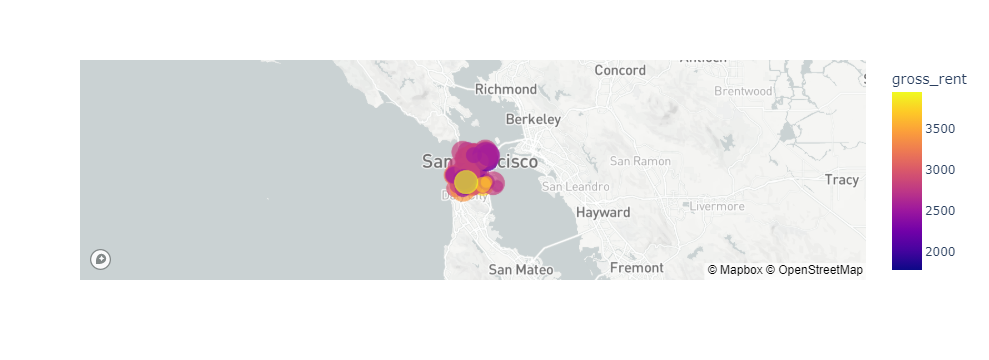

In [21]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
neighborhood_mapbox = px.scatter_mapbox(
    neighborhood_mean,
    lat="Lat",
    lon="Lon",
    size='sale_price_sqr_foot',
    color='gross_rent',
    hover_name="Neighborhood"
)

neighborhood_mapbox.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [23]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = neighborhood_cost[neighborhood_cost["neighborhood"].isin(most_expensive["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
7   2010        Cow Hollow           569.379968         372560        1239
31  2010     Miraloma Park           680.608729         372560        1239
41  2010   Pacific Heights           496.516014         372560        1239
46  2010      Potrero Hill           491.450004         372560        1239
47  2010  Presidio Heights           549.417931         372560        1239

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


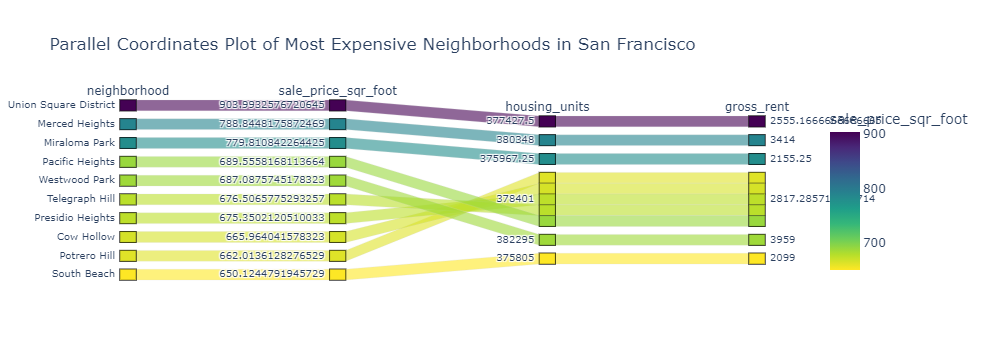

In [35]:
# Parallel Categories Plot
px.parallel_categories(
    most_expensive,
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Viridis_r,
    title='Parallel Coordinates Plot of Most Expensive Neighborhoods in San Francisco'
)

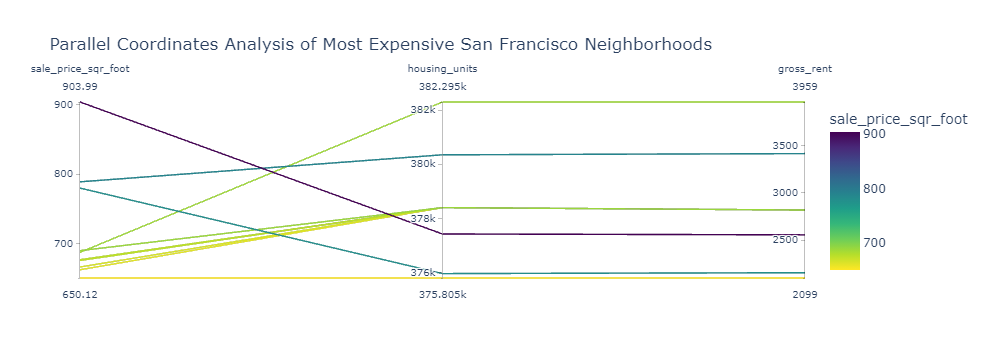

In [36]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    most_expensive,
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Viridis_r,
    title='Parallel Coordinates Analysis of Most Expensive San Francisco Neighborhoods'
)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

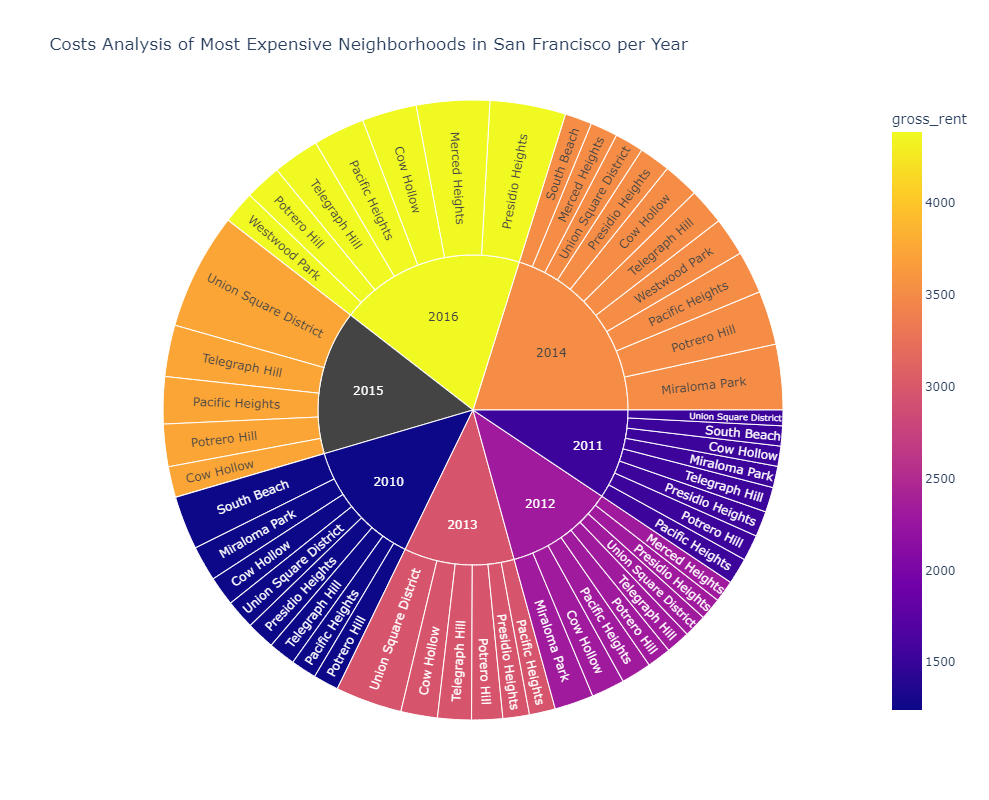

In [41]:
# Sunburst Plot
sunburst = px.sunburst(
    df_expensive_neighborhoods_per_year,
    path=['year', 'neighborhood'],
    values='sale_price_sqr_foot',
    color='gross_rent',
    title='Costs Analysis of Most Expensive Neighborhoods in San Francisco per Year',
    height=800
)

sunburst.show()